In [1]:
import pandas as pd
from collections import Counter
import re
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import glob
from tqdm.notebook import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse
from scipy.sparse.linalg import svds


from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
df4model = pd.read_csv('../data/df4model.csv')

In [90]:
df4model.head()

subject_id   hadm_id  icd  \
0    10000980  29654838  I50   
1    10000980  26913865  I50   
2    10000980  24947999  I50   
3    10000980  25242409  I50   
4    10000980  25911675  I50   

                                          long_title  \
0              Congestive heart failure, unspecified   
1            Acute on chronic systolic heart failure   
2            Acute on chronic systolic heart failure   
3              Congestive heart failure, unspecified   
4  Acute on chronic systolic (congestive) heart f...   

                chief_complaint          surgical_invasive_procedure  \
0          Shortness of breath                                 None    
1                      dyspnea             Cardiac catheterization     
2  Dyspnea and chest tightness    Pharmacologic nuclear stress test    
3                          DVT                                  EGD    
4              fatigue, anemia                                 None    

                             history_present_illness  \
0   yo woman with h/o hypertension, hyperlipidemi...   
1  This is a  M with history of diabetes, diastol...   
2   year old female with history of HTN, HLD, hx ...   
3  This is a  y/o female with PMHx significant fo...   
4    is a  year old woman with a past medical his...   

                                 past_medcal_history social_history  \
0  1. CAD RISK FACTORS: +Diabetes, +Dyslipidemia,...            NaN   
1   hypertension diabetes hx CVA (cerebellarmedul...            NaN   
2   hypertension   diabetes   hx CVA (cerebellarm...            NaN   
3   hypertension   diabetes   hx CVA (cerebellarm...            NaN   
4   hypertension   diabetes   hx CVA (cerebellarm...            NaN   

                                      family_history  ... icd_E11 icd_E78  \
0  Denies cardiac family history. Family hx of DM...  ...       1       1   
1  Niece had some sort of cancer. Otherwise, no f...  ...       1       0   
2  Niece had some sort of cancer. Father died in ...  ...       1       1   
3  Niece had some sort of cancer. Father died in ...  ...       1       1   
4  Niece had some sort of cancer. Father died in ...  ...       1       0   

  icd_E87 icd_F32 icd_I16 icd_I50 icd_N17 icd_Y92 icd_Z85  \
0       0       0       0       1       0       0       0   
1       0       0       0       1       0       0       0   
2       0       0       0       1       0       0       0   
3       0       0       0       1       1       1       0   
4       0       0       0       1       0       0       0   

                                             dis_mer  
0  Home With Service Hypertension with hypertensi...  
1  Home With Service PRIMARY DIAGNOSIS:Severe mit...  
2  Home With Service Primary Diagnosis: Acute on ...  
3  Extended Care Primary:Deep vein thrombosis (DV...  
4  Home With Service Primary diagnosis:AnemiaCong...  

[5 rows x 30 columns]

In [82]:
df4model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263941 entries, 0 to 263940
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   subject_id                   263941 non-null  int64  
 1   hadm_id                      263941 non-null  int64  
 2   icd                          263941 non-null  object 
 3   long_title                   263941 non-null  object 
 4   chief_complaint              254925 non-null  object 
 5   surgical_invasive_procedure  262742 non-null  object 
 6   history_present_illness      259193 non-null  object 
 7   past_medcal_history          259530 non-null  object 
 8   social_history               6056 non-null    object 
 9   family_history               256407 non-null  object 
 10  physical_exam                250189 non-null  object 
 11  pertinent_results            252521 non-null  object 
 12  hospital_course              230437 non-null  object 
 13 

In [85]:
categories = ['icd_E11', 'icd_E78','icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92','icd_Z85']

variables = [ 'history_present_illness', 'past_medcal_history', 'social_history', 'family_history',
       'physical_exam', 'pertinent_results', 'hospital_course',
       'medication_on_admission', 'medication_on_discharge',
       'discharge_disposition', 'discharge_diagnosis', 'discharge_condition',
       'discharge_instruction', 'followup_instruction'] 

df4model['dis_mer'] = (df4model['discharge_disposition']+ 
                        df4model['discharge_diagnosis']+
                        df4model['discharge_condition']+
                        df4model['discharge_instruction'])#these are object do we need to use astype(str)

# train, test = train_test_split(df4model, random_state=42, test_size=0.33, shuffle=True)
# X_train = train.discharge_instruction
# X_test = test.discharge_instruction
# y_train = train[categories]
# y_test = test[categories]

# print(X_train.shape)
# print(X_test.shape)

In [4]:
print(df4model.head())
print('--------------')
print(df4model.tail())
print('--------------')
print(df4model.shape)
print('--------------')
print(df4model.columns)
print('--------------')


   subject_id   hadm_id  icd  \
0    10000980  29654838  I50   
1    10000980  26913865  I50   
2    10000980  24947999  I50   
3    10000980  25242409  I50   
4    10000980  25911675  I50   

                                          long_title  \
0              Congestive heart failure, unspecified   
1            Acute on chronic systolic heart failure   
2            Acute on chronic systolic heart failure   
3              Congestive heart failure, unspecified   
4  Acute on chronic systolic (congestive) heart f...   

                chief_complaint          surgical_invasive_procedure  \
0          Shortness of breath                                 None    
1                      dyspnea             Cardiac catheterization     
2  Dyspnea and chest tightness    Pharmacologic nuclear stress test    
3                          DVT                                  EGD    
4              fatigue, anemia                                 None    

                             history_

<Axes: >

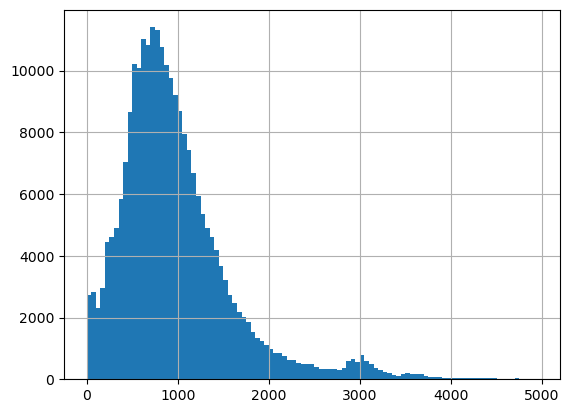

In [5]:
df4model['dis_mer'].str.len().hist(bins = np.arange(0,5000,50))

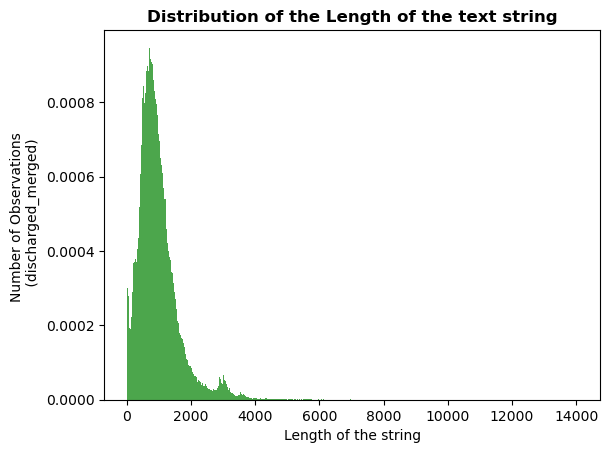

In [43]:
data = df4model['dis_mer'].str.len()
num_bins= 500

# plt.hist(data)
plt.hist(data, num_bins,
         density = 1,
        color ='green',
        alpha = 0.7)
plt.ylabel('Number of Observations \n (discharged_merged)')
plt.xlabel('Length of the string')

# plt.barh(df.Issue, df.Count)
# plt.xticks(rotation=90)
# plt.xlabel("Counts")
# plt.ylabel("Issue")
plt.title("Distribution of the Length of the text string", fontweight = "bold")
plt.show()

In [58]:
import plotly.express as px

data = df4model['dis_mer'].str.len()
fig = px.histogram(data,
                  nbins = 500)
fig.show()

In [63]:
df4model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263941 entries, 0 to 263940
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   subject_id                   263941 non-null  int64  
 1   hadm_id                      263941 non-null  int64  
 2   icd                          263941 non-null  object 
 3   long_title                   263941 non-null  object 
 4   chief_complaint              254925 non-null  object 
 5   surgical_invasive_procedure  262742 non-null  object 
 6   history_present_illness      259193 non-null  object 
 7   past_medcal_history          259530 non-null  object 
 8   social_history               6056 non-null    object 
 9   family_history               256407 non-null  object 
 10  physical_exam                250189 non-null  object 
 11  pertinent_results            252521 non-null  object 
 12  hospital_course              230437 non-null  object 
 13 

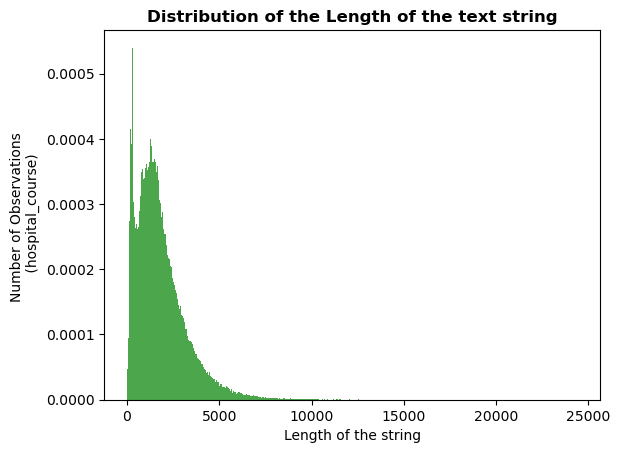

In [45]:
data = df4model['hospital_course'].str.len()
num_bins= 500

# plt.hist(data)
plt.hist(data, num_bins,
                            density = 1,
                            color ='green',
                            alpha = 0.7)
plt.ylabel('Number of Observations \n (hospital_course)')
plt.xlabel('Length of the string')

# plt.barh(df.Issue, df.Count)
# plt.xticks(rotation=90)
# plt.xlabel("Counts")
# plt.ylabel("Issue")
plt.title("Distribution of the Length of the text string", fontweight = "bold")
plt.show()

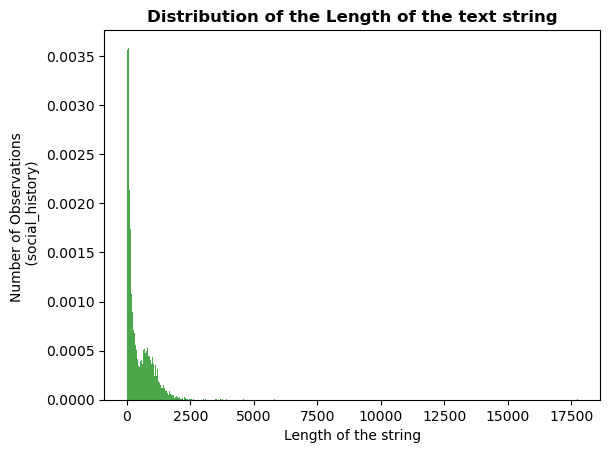

In [54]:
data = df4model['social_history'].str.len()
num_bins= 500

# plt.hist(data)
plt.hist(data, num_bins,
                            density = 1,
                            color ='green',
                            alpha = 0.7)
plt.ylabel('Number of Observations \n (social_history)')
plt.xlabel('Length of the string')

# plt.barh(df.Issue, df.Count)
# plt.xticks(rotation=90)
# plt.xlabel("Counts")
# plt.ylabel("Issue")
plt.title("Distribution of the Length of the text string", fontweight = "bold")
plt.show()

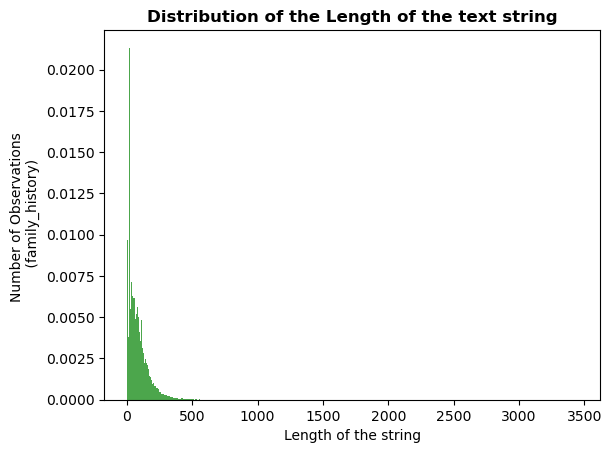

In [55]:
data = df4model['family_history'].str.len()
num_bins= 500

# plt.hist(data)
plt.hist(data, num_bins,
                            density = 1,
                            color ='green',
                            alpha = 0.7)
plt.ylabel('Number of Observations \n (family_history)')
plt.xlabel('Length of the string')

# plt.barh(df.Issue, df.Count)
# plt.xticks(rotation=90)
# plt.xlabel("Counts")
# plt.ylabel("Issue")
plt.title("Distribution of the Length of the text string", fontweight = "bold")
plt.show()

In [13]:

# !pip install wordcloud



     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [70]:
from wordcloud import WordCloud, STOPWORDS

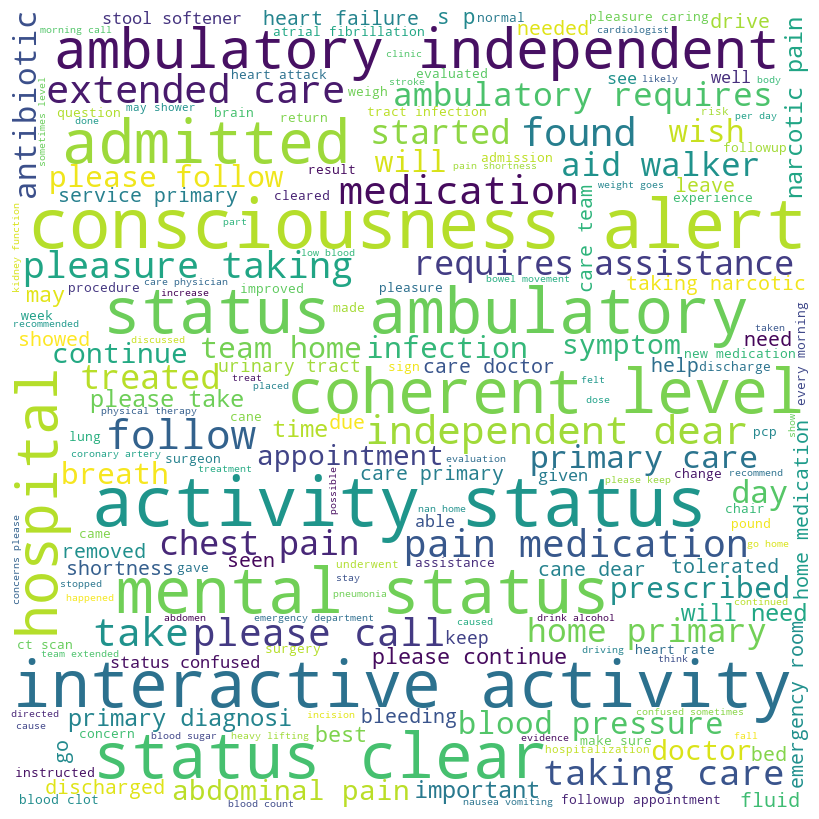

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df4model.dis_mer:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

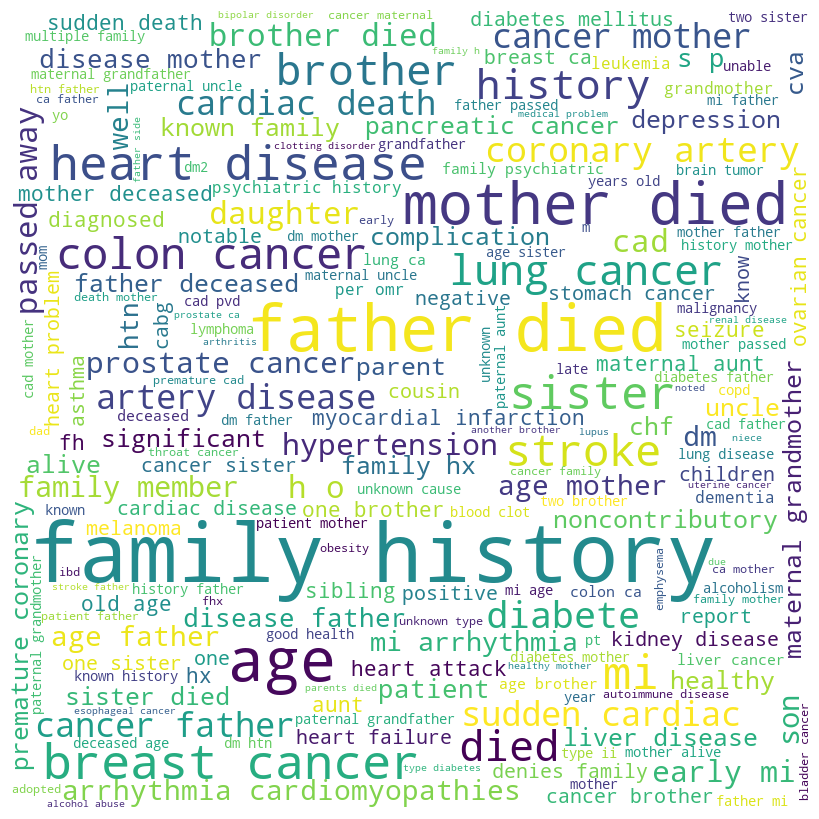

In [89]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df4model.family_history.drop_duplicates():
# for val in df4model.family_history:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [17]:
df4model.columns

Index(['subject_id', 'hadm_id', 'icd', 'long_title', 'chief_complaint',
       'surgical_invasive_procedure', 'history_present_illness',
       'past_medcal_history', 'social_history', 'family_history',
       'physical_exam', 'pertinent_results', 'hospital_course',
       'medication_on_admission', 'medication_on_discharge',
       'discharge_disposition', 'discharge_diagnosis', 'discharge_condition',
       'discharge_instruction', 'followup_instruction', 'icd_E11', 'icd_E78',
       'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92',
       'icd_Z85', 'dis_mer'],
      dtype='object')

In [29]:
len(df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()) #32018
len(df4model.loc[df4model['icd_E78']==1]['subject_id'].unique()) #57628
len(df4model.loc[df4model['icd_E87']==1]['subject_id'].unique()) #36914
len(df4model.loc[df4model['icd_F32']==1]['subject_id'].unique()) #27325
len(df4model.loc[df4model['icd_I16']==1]['subject_id'].unique()) #44561
len(df4model.loc[df4model['icd_I50']==1]['subject_id'].unique()) #23179
len(df4model.loc[df4model['icd_N17']==1]['subject_id'].unique()) #30883
len(df4model.loc[df4model['icd_Y92']==1]['subject_id'].unique()) #37698
len(df4model.loc[df4model['icd_Z85']==1]['subject_id'].unique()) #23920

23920

In [ ]:
# df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()

In [30]:
from venn import venn

<Axes: >

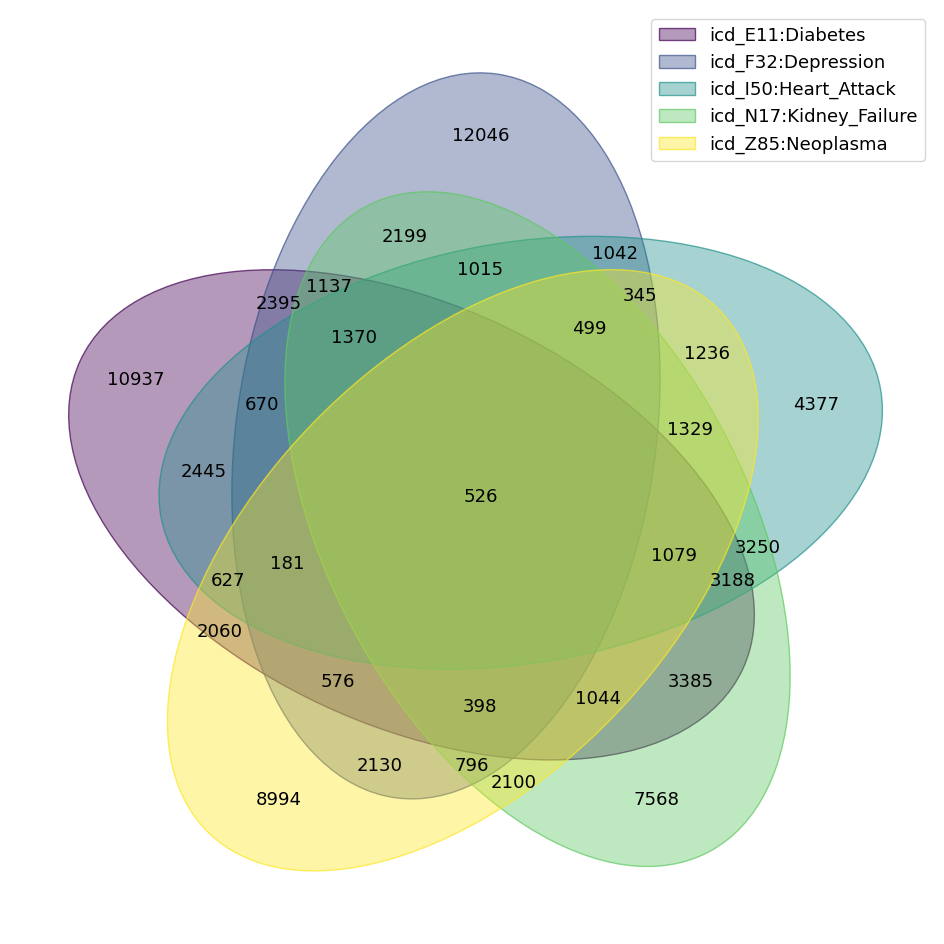

In [45]:
labels=['icd_E11:Diabetes', 
        'icd_E78:Hypertension',
       'icd_E87:AcidBaseDisorder', 
        'icd_F32:Depression', 
        'icd_I16:Hyperlipidemia',
        'icd_I50:Heart_Attack',
        'icd_N17:Kidney_Failure',
        'icd_Y92:Accident',
       'icd_Z85:Neoplasma']

sets = {
    labels[0]: set(df4model.loc[df4model['icd_E11']==1]['subject_id'].unique()),
#     labels[1]: set(df4model.loc[df4model['icd_E78']==1]['subject_id'].unique()),
#     labels[2]: set(df4model.loc[df4model['icd_E87']==1]['subject_id'].unique()),
    labels[3]: set(df4model.loc[df4model['icd_F32']==1]['subject_id'].unique()),
#     labels[4]: set(df4model.loc[df4model['icd_I16']==1]['subject_id'].unique()),
    labels[5]: set(df4model.loc[df4model['icd_I50']==1]['subject_id'].unique()),
    labels[6]: set(df4model.loc[df4model['icd_N17']==1]['subject_id'].unique()),
#     labels[7]: set(df4model.loc[df4model['icd_Y92']==1]['subject_id'].unique()),
    labels[8]: set(df4model.loc[df4model['icd_Z85']==1]['subject_id'].unique())
    }
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
                 
                 

In [83]:
df4model['followup_instruction'].iloc[10]

df4model['followup_instruction'].isna().sum()
# df4model['followup_instruction'].info()


263941

In [86]:
categories = ['icd_E11', 'icd_E78','icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92','icd_Z85']

# variables = [ 'history_present_illness', 'past_medcal_history', 'social_history', 'family_history',
#        'physical_exam', 'pertinent_results', 'hospital_course',
#        'medication_on_admission', 'medication_on_discharge',
#        'discharge_disposition', 'discharge_diagnosis', 'discharge_condition',
#        'discharge_instruction'] 

# df4model['dis_mer'] = df4model['discharge_disposition']+ df4model['discharge_diagnosis'] #these are object do we need to use astype(str)

train, test = train_test_split(df4model, random_state=42, test_size=0.33, shuffle=True)
X_train = train.dis_mer
X_test = test.dis_mer
y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(176840,)
(87101,)


In [87]:
# traing classifier

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

var_pre = {}


for category in categories:
    print('... Processing {}'.format(category))
    
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    var_pre[category] = prediction
    
    
#     print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

nb_pred = pd.DataFrame(var_pre)

print(nb_pred)

... Processing icd_E11


ValueError: np.nan is an invalid document, expected byte or unicode string.